In [2]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/Colab Notebooks/wine.csv"
#!ls "/content/drive/MyDrive/Colab Notebooks/"

df = pd.read_csv(file_path)
print(df.head())

Mounted at /content/drive
   Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0     1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1     1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2     1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3     1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4     1    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04  2.93      735  


In [3]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader

import numpy as np
import math

class SoftDrinkDataset(Dataset):
  def __init__(self) -> None:
    # data loader
    data = np.loadtxt(file_path, delimiter= ",", dtype = np.float32, skiprows=1)
   #matrix tensors
    self.x =torch.from_numpy(data[:,1:]) #holds all feature vecotrs take all rows, all colums from index 1 and onward (col 1 is intended to be target rest are features) and convert to input tensor
    self.y=torch.from_numpy (data[:,[0]]) # holds all labels targets nsamples, 1
    self.n_samples=data.shape[0]
    self.n_features=data.shape[1]

  def __getitem__(self,index):
    return self.x[index], self.y[index]
  def __len__(self):
      return self.n_samples

dataset=SoftDrinkDataset()
first_data=dataset[3] # callls __getitem__(0) returns self.x[0], selfy[0]
features,labels=first_data
print(features)
print(labels)

ns=len(dataset)
print('number of samples: '+ str(ns))



tensor([1.4370e+01, 1.9500e+00, 2.5000e+00, 1.6800e+01, 1.1300e+02, 3.8500e+00,
        3.4900e+00, 2.4000e-01, 2.1800e+00, 7.8000e+00, 8.6000e-01, 3.4500e+00,
        1.4800e+03])
tensor([1.])
number of samples: 178


In [4]:
#load dataset into minibatches, shuffle them in needed and load them in parallel using multiple worers

dataloader= DataLoader(dataset=dataset, batch_size=4, shuffle=True)

dataiter= iter(dataloader)
data=next(dataiter)
features,labels=data
print(features)
print(labels)


tensor([[1.3160e+01, 3.5700e+00, 2.1500e+00, 2.1000e+01, 1.0200e+02, 1.5000e+00,
         5.5000e-01, 4.3000e-01, 1.3000e+00, 4.0000e+00, 6.0000e-01, 1.6800e+00,
         8.3000e+02],
        [1.2720e+01, 1.8100e+00, 2.2000e+00, 1.8800e+01, 8.6000e+01, 2.2000e+00,
         2.5300e+00, 2.6000e-01, 1.7700e+00, 3.9000e+00, 1.1600e+00, 3.1400e+00,
         7.1400e+02],
        [1.3480e+01, 1.8100e+00, 2.4100e+00, 2.0500e+01, 1.0000e+02, 2.7000e+00,
         2.9800e+00, 2.6000e-01, 1.8600e+00, 5.1000e+00, 1.0400e+00, 3.4700e+00,
         9.2000e+02],
        [1.3940e+01, 1.7300e+00, 2.2700e+00, 1.7400e+01, 1.0800e+02, 2.8800e+00,
         3.5400e+00, 3.2000e-01, 2.0800e+00, 8.9000e+00, 1.1200e+00, 3.1000e+00,
         1.2600e+03]])
tensor([[3.],
        [2.],
        [1.],
        [1.]])


In [5]:
#mock data training
num_epochs=2
total_samples=len(dataset)
n_iterations = math.ceil(total_samples/4)
print(total_samples, n_iterations)

for epoch in range(num_epochs):
  for i, (inputs, labels) in enumerate(dataloader):
    #forward backward, update
    if (i+1)%5 == 0:
      print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_iterations}, inputs {inputs.shape}')

178 45
epoch 1/2, step 5/45, inputs torch.Size([4, 13])
epoch 1/2, step 10/45, inputs torch.Size([4, 13])
epoch 1/2, step 15/45, inputs torch.Size([4, 13])
epoch 1/2, step 20/45, inputs torch.Size([4, 13])
epoch 1/2, step 25/45, inputs torch.Size([4, 13])
epoch 1/2, step 30/45, inputs torch.Size([4, 13])
epoch 1/2, step 35/45, inputs torch.Size([4, 13])
epoch 1/2, step 40/45, inputs torch.Size([4, 13])
epoch 1/2, step 45/45, inputs torch.Size([2, 13])
epoch 2/2, step 5/45, inputs torch.Size([4, 13])
epoch 2/2, step 10/45, inputs torch.Size([4, 13])
epoch 2/2, step 15/45, inputs torch.Size([4, 13])
epoch 2/2, step 20/45, inputs torch.Size([4, 13])
epoch 2/2, step 25/45, inputs torch.Size([4, 13])
epoch 2/2, step 30/45, inputs torch.Size([4, 13])
epoch 2/2, step 35/45, inputs torch.Size([4, 13])
epoch 2/2, step 40/45, inputs torch.Size([4, 13])
epoch 2/2, step 45/45, inputs torch.Size([2, 13])


In [6]:
X = dataset.x.numpy() # convert pytorch tensor into numpy array for basic checks
y = dataset.y.numpy().ravel()
print("X.shape:", X.shape)
print("y.shape:", y.shape)
print("Unique labels", np.unique(y, return_counts=True)) #making sure labels are from 1-3 and each are even count

bad_mask = ~(np.isfinite(X))   # True if value is NaN or Inf
print(bad_mask.sum(), "bad values found")

X_clean=[]
for row in X:
  if np.all(np.isfinite(row)):
    X_clean.append(row)



X.shape: (178, 13)
y.shape: (178,)
Unique labels (array([1., 2., 3.], dtype=float32), array([59, 71, 48]))
0 bad values found


In [7]:
#standardization
from sklearn.preprocessing import StandardScaler

print("Mean per feature before scaling:", X.mean(axis=0))
print("Std per feature before scaling :", X.std(axis=0))

scaler=StandardScaler()

X_scaled=scaler.fit_transform(X)

print("Mean per feature after scaling:", X_scaled.mean(axis=0))
print("Std per feature after scaling :", X_scaled.std(axis=0))



Mean per feature before scaling: [1.3000614e+01 2.3363481e+00 2.3665185e+00 1.9494946e+01 9.9741570e+01
 2.2951121e+00 2.0292699e+00 3.6185396e-01 1.5908992e+00 5.0580897e+00
 9.5744956e-01 2.6116843e+00 7.4689325e+02]
Std per feature before scaling : [8.0954307e-01 1.1140037e+00 2.7357230e-01 3.3301697e+00 1.4242310e+01
 6.2409055e-01 9.9604911e-01 1.2410324e-01 5.7074893e-01 2.3117647e+00
 2.2792861e-01 7.0799321e-01 3.1402167e+02]
Mean per feature after scaling: [ 5.3577210e-08 -3.2816040e-08 -7.9696100e-08 -8.0365812e-09
 -1.2004644e-07 -6.6971513e-09 -1.8752024e-08 -5.0898347e-08
 -9.2085823e-09  3.0806895e-08 -8.0365815e-08 -4.0182908e-08
 -5.2572638e-08]
Std per feature after scaling : [1.         0.9999999  0.99999976 0.9999997  1.         1.
 1.         1.         0.9999999  0.99999994 0.9999998  1.0000001
 1.        ]


In [8]:
from sklearn.decomposition import PCA
#PCA pre-reduction (reducing dimensions)
pca = PCA(n_components=13)
X_pca=pca.fit_transform(X_scaled)
print("Shape after PCA:", X_pca.shape)


Shape after PCA: (178, 13)


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


(178, 2)


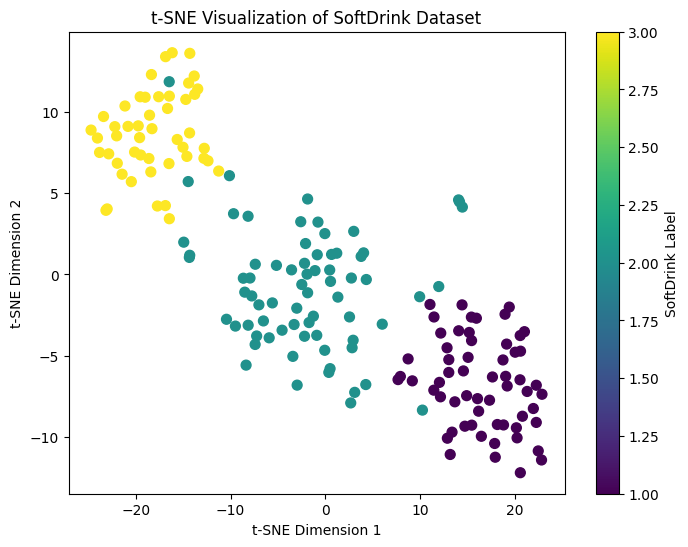

In [9]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, perplexity=20, n_iter=1000, random_state=42)

X_tsne = tsne.fit_transform(X_pca)
print(X_tsne.shape)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=dataset.y.numpy().ravel(), cmap='viridis', s=50)
plt.colorbar(label='SoftDrink Label')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of SoftDrink Dataset')
plt.show()


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



X_train, X_test, Y_train, Y_test, = train_test_split(X_tsne, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=31,  metric='manhattan')

knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)


accuracy = accuracy_score(Y_test, y_pred)
print("Test set accuracy:", accuracy)


from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", cm)

report = classification_report(Y_test, y_pred)

print("Classification Report:\n", report)

knn = KNeighborsClassifier(n_neighbors=31, metric='minkowski', p=23)

knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)


accuracy = accuracy_score(Y_test, y_pred)
print("Test set accuracy:", accuracy)


from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", cm)

report = classification_report(Y_test, y_pred)

print("Classification Report:\n", report)



knn = KNeighborsClassifier(n_neighbors=31)

knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)


accuracy = accuracy_score(Y_test, y_pred)
print("Test set accuracy:", accuracy)


from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", cm)

report = classification_report(Y_test, y_pred)

print("Classification Report:\n", report)



Test set accuracy: 0.9444444444444444
Confusion Matrix:
 [[19  0  0]
 [ 0 18  3]
 [ 0  0 14]]
Classification Report:
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        19
         2.0       1.00      0.86      0.92        21
         3.0       0.82      1.00      0.90        14

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54

Test set accuracy: 0.9444444444444444
Confusion Matrix:
 [[19  0  0]
 [ 0 18  3]
 [ 0  0 14]]
Classification Report:
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        19
         2.0       1.00      0.86      0.92        21
         3.0       0.82      1.00      0.90        14

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54

Te

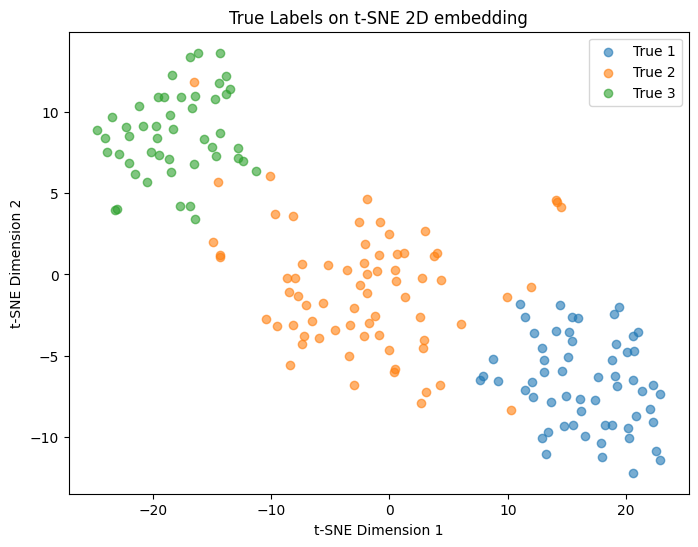

In [35]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,6))
for label in np.unique(y):
  idx = np.where(y == label)
  plt.scatter(X_tsne[idx, 0], X_tsne[idx, 1], label=f'True {int(label)}', alpha=0.6)

plt.title("True Labels on t-SNE 2D embedding")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend()
plt.show()


